## MAMM - 2012 to 2014 - Analysing multiple flights covering several years

For the MAMM campaign (Methane in the Arctic: Measurements and Modelling) the FAAM aircraft went to Kiruna, Sweden several times to measure methane concentrations over the wetlands in Sweden and Finland.

In [15]:
%matplotlib inline

import cis
import datetime
import os

ROOT_DATA_PATH = '/home/axel/Dropbox/cis_workshop/data/mamm'

os.chdir(ROOT_DATA_PATH)

Reading in **all** data files. Those files have been created previously by merging the FAAM core netCDF with the FGGA (Fast Greenhouse Gashouse Analyser) instrument. By default the core dataset does not contain either the CO2 or the CH4 data.

In [10]:
methane = cis.read_data_list(ROOT_DATA_PATH+'/*/core_faam*.nc', 'CH4')

UngriddedDataList: 
0: Ungridded data: CH4 / (unknown) 
Coordinates: 
  Time
  LAT_GIN
  LON_GIN
  ALT_GIN



In [7]:
print(methane)

UngriddedDataList: 
0: Ungridded data: CH4 / (unknown) 
Coordinates: 
  Time
  LAT_GIN
  LON_GIN
  ALT_GIN



Plot time series of methane.

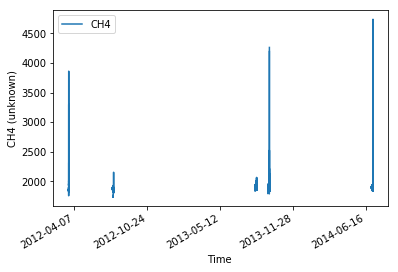

In [19]:
methane.plot(xaxis='Time')

Subsetting for the three years 2012, 2013, and 2014.

In [21]:
data = {}
data['2012'] = methane.subset(t=[datetime.datetime(2012, 1, 1), datetime.datetime(2013, 1, 1)])
data['2013'] = methane.subset(t=[datetime.datetime(2013, 1, 1), datetime.datetime(2014, 1, 1)])
data['2014'] = methane.subset(t=[datetime.datetime(2014, 1, 1), datetime.datetime(2015, 1, 1)])

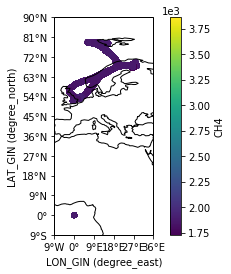

In [22]:
data['2012'].plot()

Aggregate all the data, where every cell is 0.5x0.5 degrees wide and look only at data for the lowest 1000m.

In [48]:
for year in ['2012', '2013', '2014']:
    data[year+'_agg'] = data[year].aggregate(x=[10, 40, 0.5],
                                             y=[65, 85, 0.5],
                                             z=[0,1000,1000],
                                             how='mean')

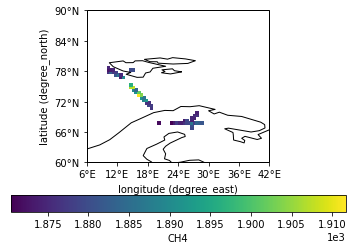

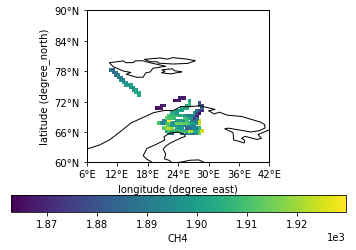

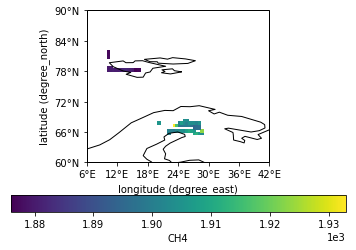

In [49]:
data['2012_agg'].plot()
data['2013_agg'].plot()
data['2014_agg'].plot()